## Problem Statement : 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 

The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
lead_data=pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
#Checking the rows & columns of lead data
lead_data.shape

(9240, 37)

In [4]:
#checking info of the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 1. Data Cleaning and treating missing values

In [5]:
# Making all "Select" to NAN
lead_data=lead_data.apply(lambda x: x.replace('Select',np.nan))

In [6]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [7]:
# checking missing valus in the data
feature_na=[features for features in lead_data.columns if lead_data[features].isnull().sum()>=1]
for feature in feature_na:
    print(feature,'-',np.round(100*lead_data[feature].isnull().mean(),2),"%")

Lead Source - 0.39 %
TotalVisits - 1.48 %
Page Views Per Visit - 1.48 %
Last Activity - 1.11 %
Country - 26.63 %
Specialization - 36.58 %
How did you hear about X Education - 78.46 %
What is your current occupation - 29.11 %
What matters most to you in choosing a course - 29.32 %
Tags - 36.29 %
Lead Quality - 51.59 %
Lead Profile - 74.19 %
City - 39.71 %
Asymmetrique Activity Index - 45.65 %
Asymmetrique Profile Index - 45.65 %
Asymmetrique Activity Score - 45.65 %
Asymmetrique Profile Score - 45.65 %


- We observe there are lot of null values in the data set so we will remove the ones with >60% null values.

In [8]:
#Total no of columns having more than 60% null values
null_col=(np.round(100*lead_data.isnull().mean(),2))
len(null_col[null_col>=60])

2

In [9]:
# Dropping the 2 identified columns in above step
lead_data=lead_data.loc[:,lead_data.isnull().mean()<0.6]

#Checking the shape
lead_data.shape

(9240, 35)

In [10]:
#We will drop the unwanted columns before continuation of null value treatment
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
#Dropping the unwanted columns which is not required for our analysis
lead_data=lead_data.drop(['Prospect ID','What matters most to you in choosing a course'],axis=1)

### Null value treatment

In [12]:
#Country col value counts
lead_data['Country'].value_counts().head()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

- We observe that India has the most number of counts (mode of the data) so we will replace the missing values with the mode of the data

In [13]:
# Replacing the null values with mode
mod_val=lead_data['Country'].mode()[0]
lead_data['Country'].fillna(mod_val,inplace=True)

In [14]:
lead_data['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
# creating groups with india and not india for better analysis
def country_category(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Provided":
        category = "Not Provided"
    else:
        category = "Outside India"
    return category

lead_data['Country'] = lead_data.apply(lambda x:country_category(x['Country']), axis = 1)
lead_data['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

In [16]:
# Now we will check the value counts of specialization col
lead_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
#Checking the count of null values
lead_data['Specialization'].isnull().sum()

3380

- Here we cannot impute the null values with mode as it will deviate the analysis so we will keep the missing values as missing only

In [18]:
lead_data['Specialization'].fillna('No Information',inplace=True)
lead_data['Specialization'].value_counts()

No Information                       3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#Checking What is your current occupation column
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
lead_data['What is your current occupation'].isnull().sum()

2690

- Here we will again keep the missing values as "no info" because imputing it with mode will deviate the analysis

In [21]:
#Replacing null values of What is your current occupation col
lead_data['What is your current occupation'].fillna('No Information', inplace=True)
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
#Checking the Tags col
lead_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [23]:
lead_data['Tags'].isnull().sum()

3353

- Here we will again keep the missing values as "no info" because imputing it with mode will deviate the analysis

In [24]:
#Replacing null values with No information
lead_data['Tags'].fillna('No Information', inplace=True)
lead_data['Tags'].value_counts()

No Information                                       3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
# Now we will check the lead quality col
lead_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

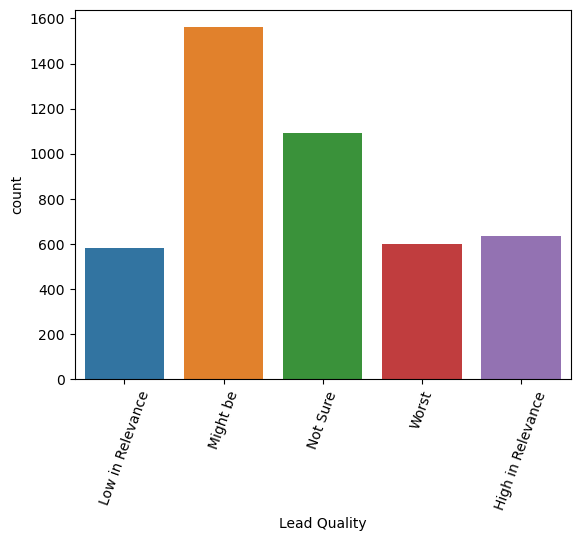

In [26]:
sns.countplot(lead_data['Lead Quality'])
plt.xticks(rotation=70)
plt.show()

In [27]:
lead_data['Lead Quality'].isnull().sum()

4767

- Since we do not have any additional information we will keep the missing values as no info

In [28]:
#Creating new category as No Information for null values
lead_data['Lead Quality'].fillna('No Information', inplace=True)
lead_data['Lead Quality'].value_counts()

No Information       4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [29]:
#Checking the col city
lead_data['City'].value_counts(normalize=True)

Mumbai                        0.58
Thane & Outskirts             0.13
Other Cities                  0.12
Other Cities of Maharashtra   0.08
Other Metro Cities            0.07
Tier II Cities                0.01
Name: City, dtype: float64

In [30]:
lead_data['City'].isnull().sum()

3669

- Here we will keep the missing values as no info so that we do not deviate the analysis

In [31]:
# Imputing missing values
lead_data['City'].fillna('No Information',inplace=True)
lead_data['City'].value_counts()

No Information                 3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
#CHecking col Asymmetrique Activity Index
lead_data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [33]:
lead_data['Asymmetrique Activity Index'].isnull().sum()

4218

- Here we will keep the missing values as no info so that we do not deviate the analysis

In [34]:
#Creating new category as No Information for null values
lead_data['Asymmetrique Activity Index'].fillna('No Information', inplace=True)
lead_data['Asymmetrique Activity Index'].value_counts()

No Information    4218
02.Medium         3839
01.High            821
03.Low             362
Name: Asymmetrique Activity Index, dtype: int64

In [35]:
#checking more info on the col Asymmetrique Activity Score
lead_data['Asymmetrique Activity Score'].describe()

count   5022.00
mean      14.31
std        1.39
min        7.00
25%       14.00
50%       14.00
75%       15.00
max       18.00
Name: Asymmetrique Activity Score, dtype: float64

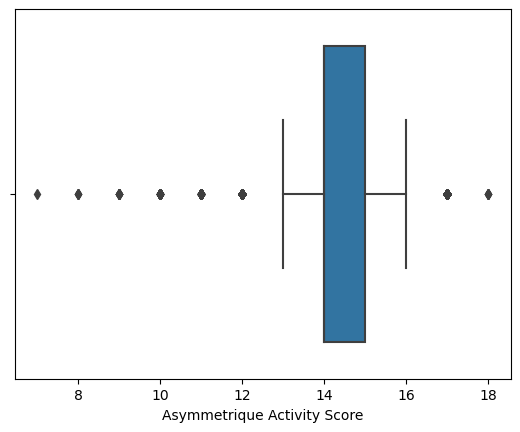

In [36]:
#Plotting bocplot to identify outliers
sns.boxplot(lead_data['Asymmetrique Activity Score'])
plt.show()

- Here we can replace the null value with the median value of the column

In [37]:
med_val=lead_data['Asymmetrique Activity Score'].median()
lead_data['Asymmetrique Activity Score'].fillna(med_val,inplace=True)
lead_data['Asymmetrique Activity Score'].isnull().sum()

0

In [38]:
#Checking more info on col Asymmetrique Profile Index
lead_data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [39]:
lead_data['Asymmetrique Profile Index'].isnull().sum()

4218

- Here we will keep the missing values as no info since we do not have any additional data to support otherwise

In [40]:
#Creating new category for null values
lead_data['Asymmetrique Profile Index'].fillna('No Information', inplace=True)
lead_data['Asymmetrique Profile Index'].value_counts()

No Information    4218
02.Medium         2788
01.High           2203
03.Low              31
Name: Asymmetrique Profile Index, dtype: int64

In [41]:
#Checking more info on col Asymmetrique Profile Score 
lead_data['Asymmetrique Profile Score'].describe()

count   5022.00
mean      16.34
std        1.81
min       11.00
25%       15.00
50%       16.00
75%       18.00
max       20.00
Name: Asymmetrique Profile Score, dtype: float64

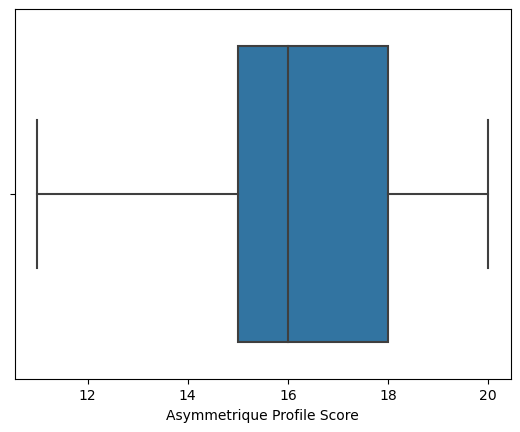

In [42]:
#Plotting boxplot to identify outliers
sns.boxplot(lead_data['Asymmetrique Profile Score'])
plt.show()

- We observe there are no outliers in the data so we will replace the null values with the median of the column

In [43]:
#Repalcing the null values with median
med_val=lead_data['Asymmetrique Profile Score'].median()
lead_data['Asymmetrique Profile Score'].fillna(med_val,inplace=True)
lead_data['Asymmetrique Profile Score'].isnull().sum()

0

In [44]:
#Checking the columns having null values around 2% 
lead_data['TotalVisits'].isnull().sum()

137

In [45]:
lead_data['TotalVisits'].describe()

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

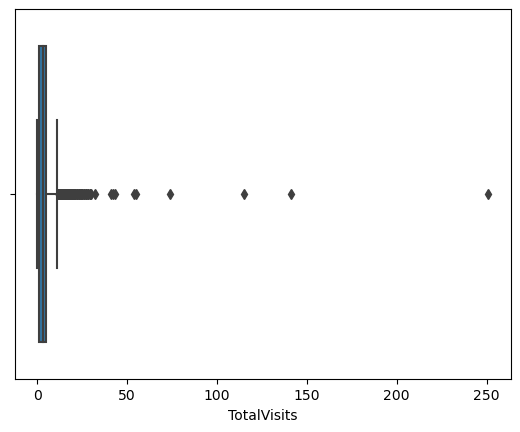

In [46]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

- Total visit of 251 seems unlikely, we will replace the missing value with median and work on the outlier in the next part of the section

In [47]:
#Replacing null values with median
med_val=lead_data['TotalVisits'].median()
lead_data['TotalVisits'].fillna(med_val,inplace=True)
lead_data['TotalVisits'].isnull().sum()

0

In [48]:
#Checking value cnt of the Lead source col
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [49]:
lead_data['Lead Source'].isnull().sum()

36

- we will replace the null values with the mode of the col

In [50]:
#Repalcing null values with mode
mod_val=lead_data['Lead Source'].mode()[0]
lead_data['Lead Source'].fillna(mod_val,inplace=True)
lead_data['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [51]:
#Checking Page Views Per Visit col
lead_data['Page Views Per Visit'].describe()

count   9103.00
mean       2.36
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       55.00
Name: Page Views Per Visit, dtype: float64

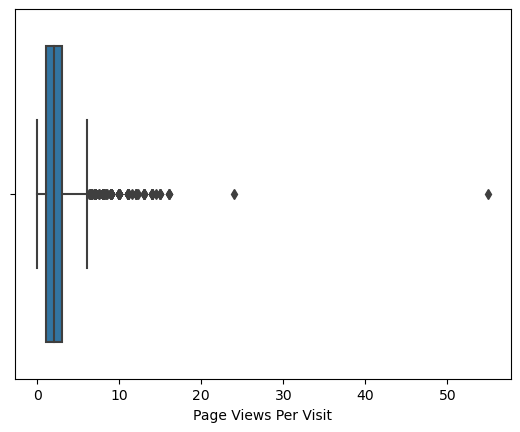

In [52]:
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

- Here we replace the null value with the median of the column

In [53]:
#Replacing missing value with the median
med_val=lead_data['Page Views Per Visit'].median()
lead_data['Page Views Per Visit'].fillna(med_val,inplace=True)
lead_data['Page Views Per Visit'].isnull().sum()

0

In [54]:
#Checking info on the col Last Activity
lead_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [55]:
#null values in the col
lead_data['Last Activity'].isnull().sum()

103

- Here we replace the null value with the median of the column

In [56]:
#replacing the null values with mode 
mod_val=lead_data['Last Activity'].mode()[0]
lead_data['Last Activity'].fillna(mod_val, inplace=True)
lead_data['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

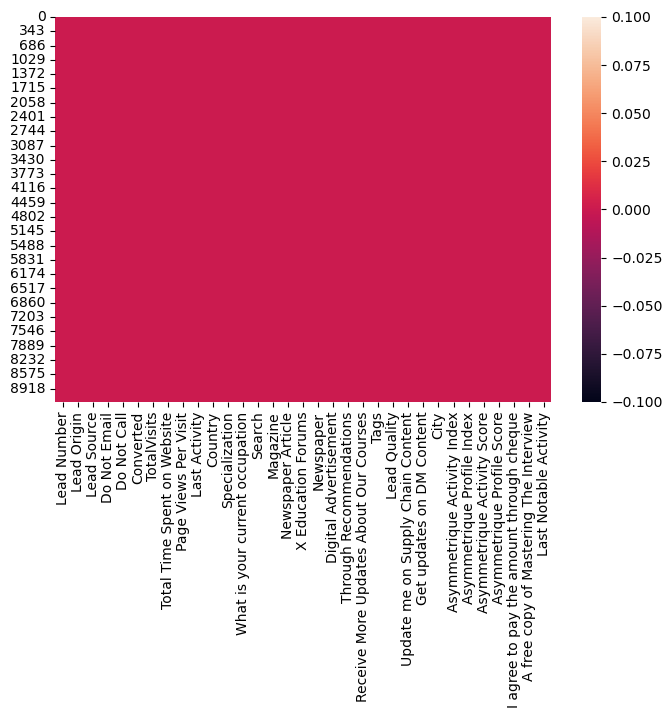

In [57]:
#We will do a final check with a heatmap to see if all null values have been treated
plt.figure(figsize=(8,5))
sns.heatmap(lead_data.isnull())
plt.show()

- From the above heatmap we can conclude that all null values have been treated

In [58]:
#We will check if there are any duplicates in the data set before we continue with EDA
lead_data[lead_data.duplicated()].shape

(0, 33)

## 2. EDA

### 2.1 Univariate Analysis

- While looking at the missing values in the above section we had observed that some of the columns have outliers, now we will work on the outliers.

In [59]:
# Checking for outliers in the continuous variables at various percentiles
num_lead=lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


- We observe that the columns total visits & page views per visit has outliers

In [60]:
lead_data.shape

(9240, 33)

In [61]:
#We will use IQR range to deal with outliers in the Total Visits col

Q1=lead_data['TotalVisits'].quantile(0.25)

Q3=lead_data['TotalVisits'].quantile(0.75)
IQR= Q3 - Q1
lead_data=lead_data.loc[(lead_data['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_data['TotalVisits'] <= Q3 + 1.4*IQR)]

#Dealing with outliers through IQR range for Page Views Per Visit col
Q1=lead_data['Page Views Per Visit'].quantile(0.25)

Q3=lead_data['Page Views Per Visit'].quantile(0.75)
IQR= Q3 - Q1
lead_data=lead_data.loc[(lead_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_data['Page Views Per Visit'] <= Q3 + 1.4*IQR)]

#Checking the shape
lead_data.shape


(8381, 33)

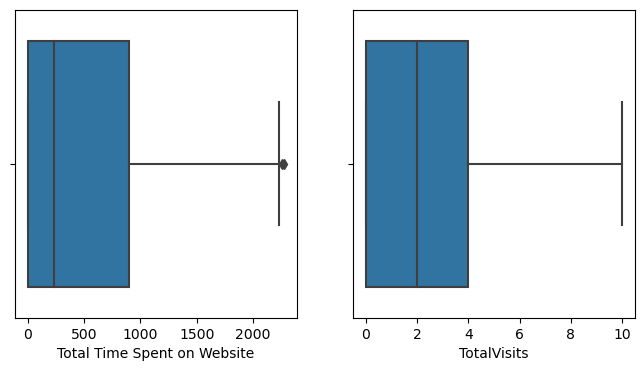

<Figure size 800x400 with 0 Axes>

In [62]:
# After Outlier removal checking Univariate Analysis
plt.figure(figsize=(8, 4))
plt.subplot(121)
sns.boxplot(data=lead_data, x='Total Time Spent on Website')
plt.subplot(122)
sns.boxplot(data=lead_data, x='TotalVisits')
plt.figure(figsize=(8, 4))
plt.show()

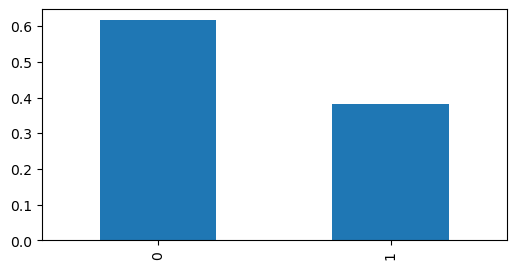

In [63]:
# Visualising the percentage of target variable through bar chart
plt.figure(figsize=(6, 3))
lead_data['Converted'].value_counts(normalize=True).plot.bar()
plt.show()

- We observe that around 38% of leads are converted

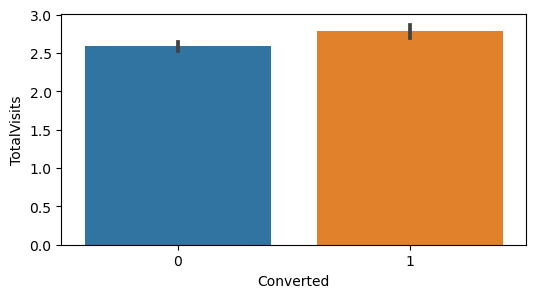

In [64]:
#checking Spread of "Total Visits" vs Converted variable
plt.figure(figsize=(6, 3))
sns.barplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

- we observe that both the counts are in similar range so we can not conclude anything here

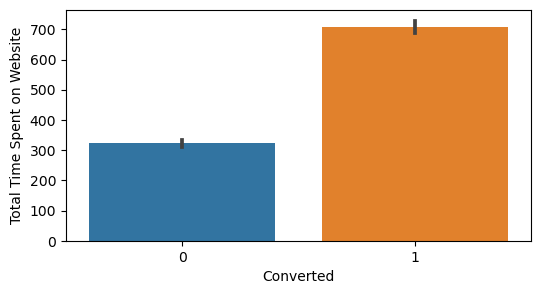

In [65]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
plt.figure(figsize=(6, 3))
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

- Leads spending more time on the website are more likely to get converted.

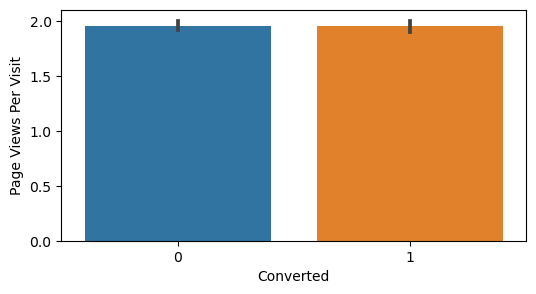

In [66]:
#checking Spread of "Page Views Per Visit" vs Converted variable
plt.figure(figsize=(6, 3))
sns.barplot(x=lead_data.Converted,y=lead_data['Page Views Per Visit'])
plt.show()

- Again the count is too similar to conclude anything here

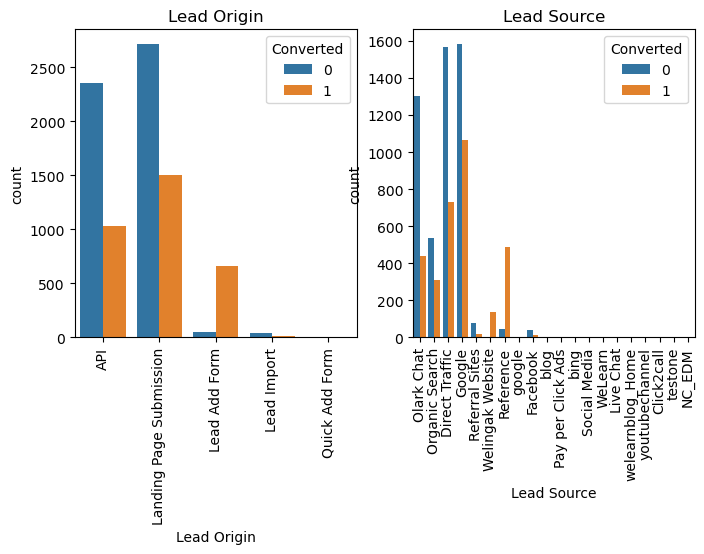

In [67]:
#Now we check the categorical variables against the target variable
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.legend(loc='upper right',title='Converted')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.legend(loc='upper right',title='Converted')
plt.show()

In [68]:
lead_data.groupby(by=['Lead Origin'])['Converted'].mean()

Lead Origin
API                       0.30
Landing Page Submission   0.36
Lead Add Form             0.92
Lead Import               0.24
Quick Add Form            1.00
Name: Converted, dtype: float64

- Note:
    - We observe that API and Landing Page Submission has approx 30% and 35% conversion leads respectively.
    - We observe that in leads source Google and Direct Traffic has more potential to convert the leads followed by Olark chat and Organic search

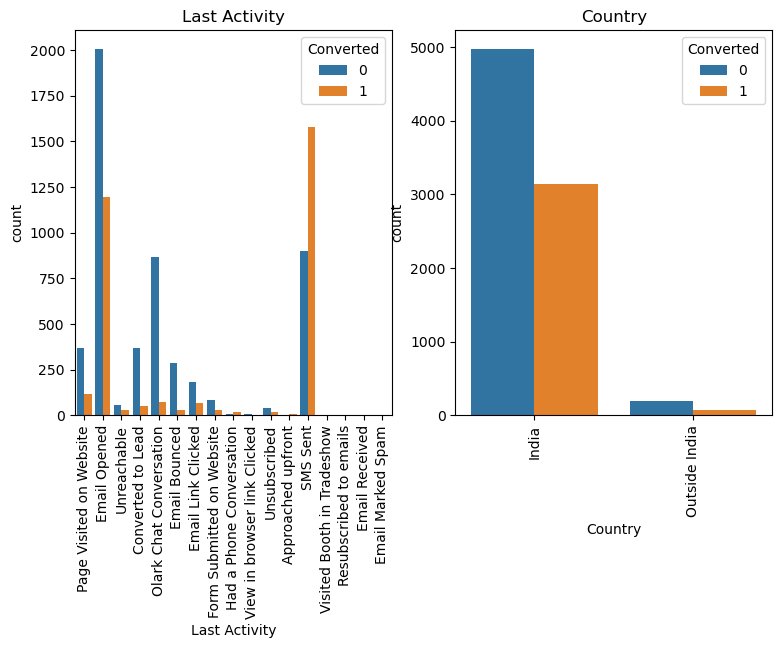

In [69]:
#Checking last activity and country columns
plt.figure(figsize = (9,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.legend(loc='upper right',title='Converted')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

- Notes:
    - We observe that SMS sent has high conversion leads followed by Email opened.
    - india has max count, also max conversion

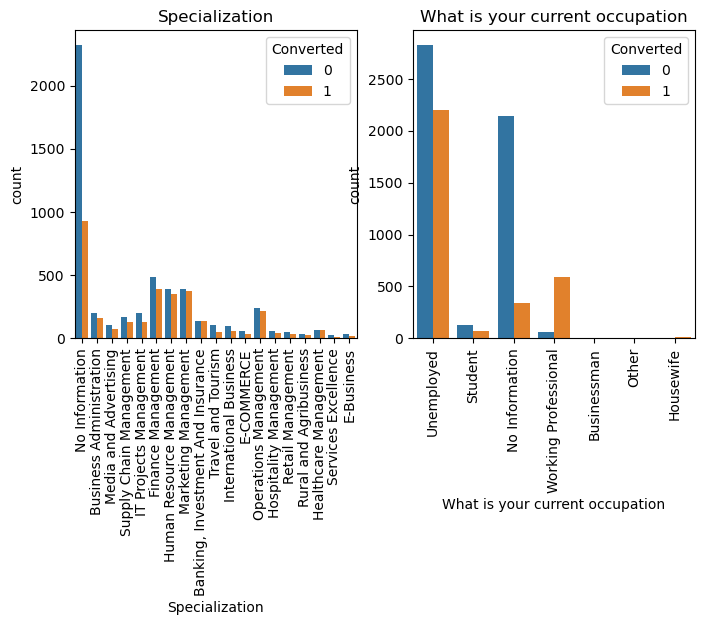

In [70]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.legend(loc='upper right',title='Converted')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.legend(loc='upper right',title='Converted')
plt.show()

- Note: 
    - We observe that the No information category has high conversion rates. Also we can see that in other specialization there are lots of opportunity to convert the leads
    - We observe that unemployed leads has high conversion rates, so focus should be made to convert more positive leads in umemployed counts, as it is obvious working professional are most likely to get converted for their growth and all.

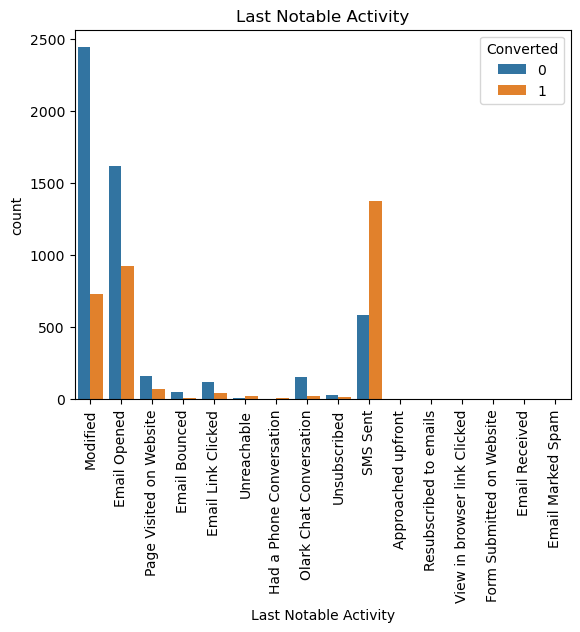

In [71]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.legend(loc='upper right',title='Converted')
plt.show()

In [72]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 2.2 Multivariate Analysis

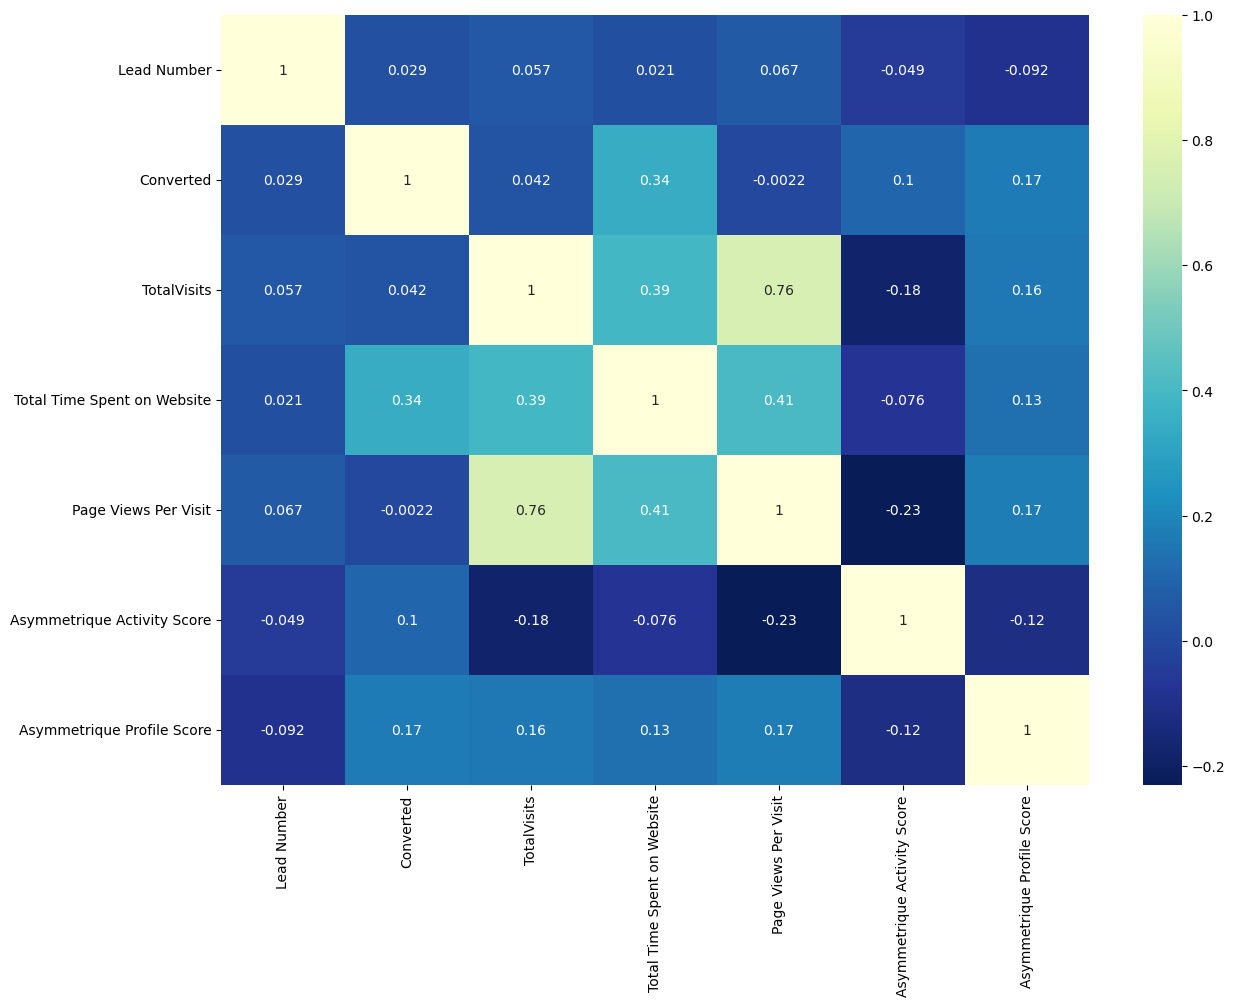

In [73]:
# Visualization of correlation
plt.figure(figsize=(14, 10))
sns.heatmap(lead_data.corr(), annot = True, cmap="YlGnBu_r")
plt.show()

#### Notes: 
    - We observe that Pages Views per visit and total visits are highly postively co related.
    - Asymmetrique activity score is negatively correlated with total visit and Pages Views per visit.


In [74]:
# Top 5 features correlated with target variable
lead_data.corr()['Converted'].abs().sort_values(ascending=False).head(6)[1:]

Total Time Spent on Website   0.34
Asymmetrique Profile Score    0.17
Asymmetrique Activity Score   0.10
TotalVisits                   0.04
Lead Number                   0.03
Name: Converted, dtype: float64

## 3. Dummy Variables

In [75]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               8381 non-null   int64  
 1   Lead Origin                               8381 non-null   object 
 2   Lead Source                               8381 non-null   object 
 3   Do Not Email                              8381 non-null   object 
 4   Do Not Call                               8381 non-null   object 
 5   Converted                                 8381 non-null   int64  
 6   TotalVisits                               8381 non-null   float64
 7   Total Time Spent on Website               8381 non-null   int64  
 8   Page Views Per Visit                      8381 non-null   float64
 9   Last Activity                             8381 non-null   object 
 10  Country                             

In [76]:
#before creating dummies determine unique values in all of the columns so that we can remove the unwanted columns
for k, v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))


Lead Origin = 5
Lead Source = 20
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
Country = 2
Specialization = 19
What is your current occupation = 7
Search = 2
Magazine = 1
Newspaper Article = 1
X Education Forums = 1
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Tags = 27
Lead Quality = 6
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 7
Asymmetrique Activity Index = 4
Asymmetrique Profile Index = 4
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


- We will drop the columns where there are only 1 unique value as it will not give any information to us.

In [77]:
# checking rest of the binary columns having less values in a new dataframe
df_rest_binary = lead_data[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                    'A free copy of Mastering The Interview','City']]

# check value counts for each of these columns
for i in df_rest_binary.columns:
    x = (df_rest_binary[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.30
Yes    7.70
Name: Do Not Email, dtype: float64

No    99.98
Yes    0.02
Name: Do Not Call, dtype: float64

No    99.93
Yes    0.07
Name: Search, dtype: float64

No    99.99
Yes    0.01
Name: Newspaper, dtype: float64

No    99.98
Yes    0.02
Name: Digital Advertisement, dtype: float64

No    99.96
Yes    0.04
Name: Through Recommendations, dtype: float64

No    71.02
Yes   28.98
Name: A free copy of Mastering The Interview, dtype: float64

No Information                42.13
Mumbai                        33.34
Thane & Outskirts              7.85
Other Cities                   7.10
Other Cities of Maharashtra    4.87
Other Metro Cities             3.96
Tier II Cities                 0.75
Name: City, dtype: float64



- From above we can drop the columns which are highly skewed with one variable as it will not give any information to our analysis

In [78]:
# Removing all the columns that are of no use in our analysis
lead_data_final = lead_data.drop(['Lead Number','Magazine','Newspaper Article','X Education Forums','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'Do Not Call','Search', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
            'Through Recommendations','Last Notable Activity','Tags',
            'Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
lead_data_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Quality,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,India,No Information,Unemployed,Low in Relevance,No Information,No
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,India,No Information,Unemployed,No Information,No Information,No
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Might be,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Not Sure,Mumbai,No
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,India,No Information,Unemployed,Might be,Mumbai,No


In [79]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8381 non-null   object 
 1   Lead Source                             8381 non-null   object 
 2   Do Not Email                            8381 non-null   object 
 3   Converted                               8381 non-null   int64  
 4   TotalVisits                             8381 non-null   float64
 5   Total Time Spent on Website             8381 non-null   int64  
 6   Page Views Per Visit                    8381 non-null   float64
 7   Last Activity                           8381 non-null   object 
 8   Country                                 8381 non-null   object 
 9   Specialization                          8381 non-null   object 
 10  What is your current occupation         8381 non-null   obje

In [80]:
lead_data_final.loc[:, lead_data_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [81]:
# Create dummy variables using the 'get_dummies' for the columns which are relevant for the analysis
dummy = pd.get_dummies(lead_data_final[['Lead Origin','Lead Source','Last Activity','Do Not Email','Specialization','What is your current occupation','Lead Quality','A free copy of Mastering The Interview']], drop_first=True)

# Adding the results to the final dataframe
lead_data_final_dum = pd.concat([lead_data_final, dummy], axis=1)
lead_data_final_dum.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Quality,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,India,No Information,Unemployed,Low in Relevance,No Information,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,India,No Information,Unemployed,No Information,No Information,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Might be,Mumbai,Yes,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Not Sure,Mumbai,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,India,No Information,Unemployed,Might be,Mumbai,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [82]:
#now after creating dummy columns we will drop the original columns
lead_data_final_dum = lead_data_final_dum.drop(['Lead Origin','Lead Source','Last Activity',
                                            'Do Not Email','Specialization','What is your current occupation','Lead Quality',
                                            'A free copy of Mastering The Interview'], 1)

In [83]:
lead_data_final_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes
0,0,0.00,0,0.00,India,No Information,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,5.00,674,2.50,India,No Information,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,2.00,1532,2.00,India,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,1.00,305,1.00,India,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,2.00,1428,1.00,India,Mumbai,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [84]:
#We will drop country and city as well
lead_data_final_dum = lead_data_final_dum.drop(['Country','City'], 1)
lead_data_final_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes
0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,2.00,1532,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,1.00,305,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,2.00,1428,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [85]:
lead_data_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8381 non-null   int64  
 1   TotalVisits                                           8381 non-null   float64
 2   Total Time Spent on Website                           8381 non-null   int64  
 3   Page Views Per Visit                                  8381 non-null   float64
 4   Lead Origin_Landing Page Submission                   8381 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8381 non-null   uint8  
 6   Lead Origin_Lead Import                               8381 non-null   uint8  
 7   Lead Origin_Quick Add Form                            8381 non-null   uint8  
 8   Lead Source_Direct Traffic                            8381

## 4. Splitting data into train and test :

In [86]:
#We will split the data into train and test
#drop the target variable from the dataset and storing the results into X dataset
X = lead_data_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes
0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2.00,1532,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1.00,305,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,2.00,1428,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [87]:
# We will put the target variable in y
y = lead_data_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## 5: Feature Scaling

In [89]:
# Let's scale the three numeric variables
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Information,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes
2930,1.48,-0.36,0.03,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
378,-0.29,-0.17,0.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2655,-1.17,-0.86,-1.29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3752,1.04,-0.42,2.02,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6388,-1.17,-0.86,-1.29,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


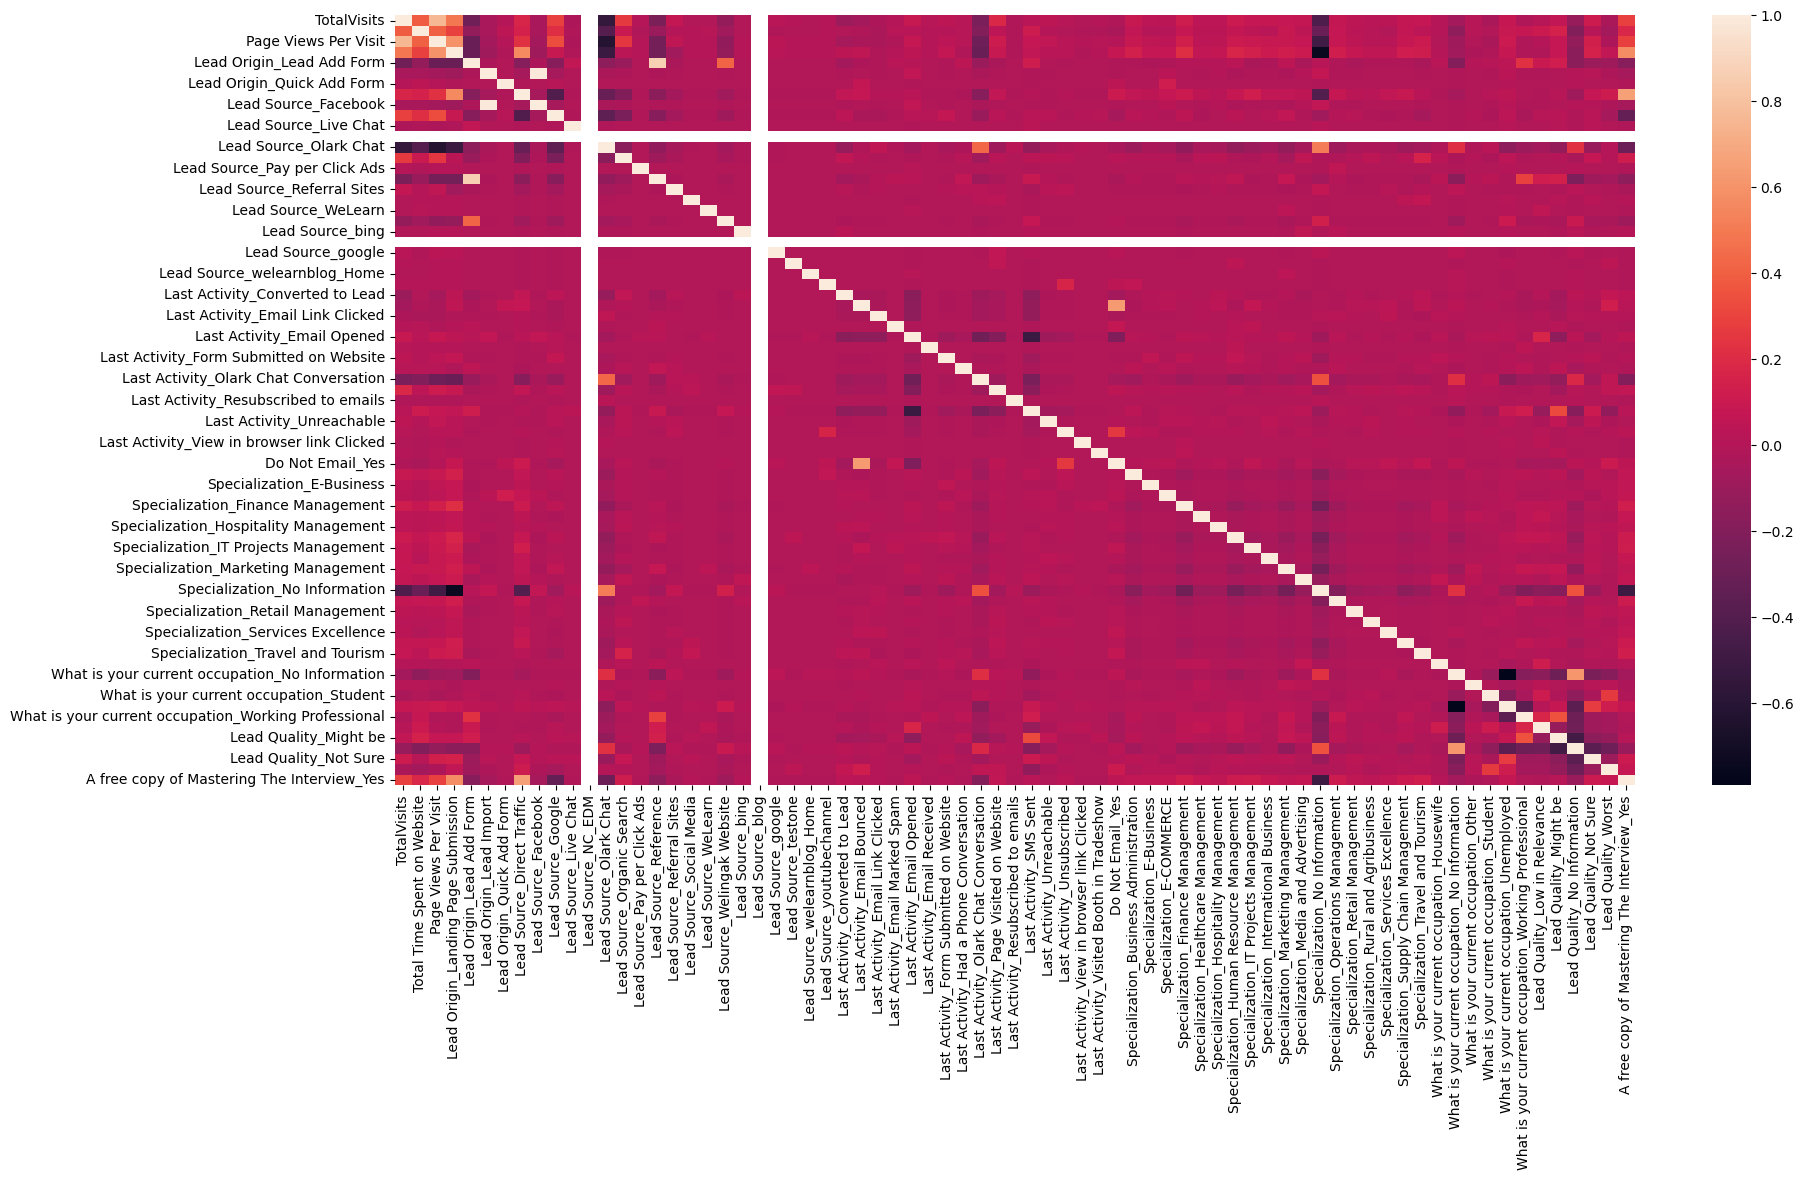

In [90]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr())
plt.show()

## 6. Model
#### 1st Model

In [91]:
# Now we will build our 1st Logistic Regression Model
logml_1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
print(logml_1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5794
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.4
Date:                Mon, 15 Jan 2024   Deviance:                       3880.9
Time:                        20:52:39   Pearson chi2:                 5.56e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Feature Selection Using RFE

In [92]:
#Creating object og Logistic Regression
logreg = LogisticRegression()

In [93]:
#Importing RFE
from sklearn.feature_selection import RFE

#And creating the object of RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)     # running RFE with 15 variables as output

#Fitting the RFE
rfe=rfe.fit(X_train,y_train)

In [94]:
# Checking the top 15 varibales output for our model
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 16),
 ('Lead Source_NC_EDM', False, 58),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 13),
 ('Lead Source_blog', False, 59),
 ('Lead Source_google', False, 40),
 ('Lead Source_testone', False, 56),
 ('Lead Source_welearnblog_Home', False, 48)

In [95]:
#Assign top 15 features to temperory variable col
col=X_train.columns[rfe.support_]

In [96]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Re

### Model 2 with stats model

In [97]:
X_train_sm=sm.add_constant(X_train[col])
logml_2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logml_2=logml_2.fit()
print(logml_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5850
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.3
Date:                Mon, 15 Jan 2024   Deviance:                       4038.7
Time:                        20:52:41   Pearson chi2:                 5.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4721
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [98]:
# Getting the predicted values on the train set
y_train_pred=logml_2.predict(X_train_sm)
y_train_pred[:10]

2930   0.07
378    0.09
2655   0.99
3752   0.30
6388   0.17
9197   0.73
7687   0.01
5403   0.87
1721   0.94
5935   0.01
dtype: float64

In [99]:
# reshaping the numpy array of y predicted values
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.07094654, 0.09159226, 0.9855939 , ..., 0.9822201 , 0.05823714,
       0.17118372])

In [100]:
# Now we will create a data frame of actual Vs predicted of target variable
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID
0,1,0.07,2930
1,0,0.09,378
2,1,0.99,2655
3,0,0.30,3752
4,0,0.17,6388


In [101]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted']=y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x>0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,Predicted
0,1,0.07,2930,0
1,0,0.09,378,0
2,1,0.99,2655,1
3,0,0.30,3752,0
4,0,0.17,6388,0


In [102]:
#Importing confusion metrics
from sklearn import metrics

#Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confusion)

[[3282  360]
 [ 546 1678]]


#### Predicted   not_Converted   Converted
#### Actual
#### not_Converted    3282      360
#### Converted        546       1678  

In [103]:
#Lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted']))

0.8455506307534947


### VIF Check

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,Lead Source_Olark Chat,1.81
12,Lead Quality_No Information,1.77
6,Last Activity_SMS Sent,1.75
11,Lead Quality_Might be,1.61
5,Last Activity_Olark Chat Conversation,1.48
1,Lead Origin_Lead Add Form,1.47
10,What is your current occupation_Working Profes...,1.31
3,Lead Source_Welingak Website,1.28
0,Total Time Spent on Website,1.24
8,Do Not Email_Yes,1.19


- VIF is good for all variables but What is your current occupation_Housewife has high p value so we will drop this variable

In [105]:
#Dropping the What is your current occupation_Housewife
col=col.drop('What is your current occupation_Housewife')

### Model 3 with stats model

In [106]:
# Let's run the 3rd model using the selected variables
X_train_sm=sm.add_constant(X_train[col])
logml_3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logml_3=logml_3.fit()
print(logml_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5851
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.0
Date:                Mon, 15 Jan 2024   Deviance:                       4042.0
Time:                        20:52:42   Pearson chi2:                 5.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4718
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [107]:
# Getting the predicted values on the train set
y_train_pred=logml_3.predict(X_train_sm)
y_train_pred[:10]

2930   0.07
378    0.09
2655   0.99
3752   0.30
6388   0.17
9197   0.73
7687   0.01
5403   0.87
1721   0.94
5935   0.01
dtype: float64

In [108]:
# reshaping the numpy array of y predicted values
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.07113182, 0.09178737, 0.98556818, ..., 0.98236532, 0.0581664 ,
       0.17124301])

In [109]:
#Creating column of prediction on train data as Converted_Prob
y_train_pred_final['Converted_Prob']=y_train_pred

In [110]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted']=y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,Predicted
0,1,0.07,2930,0
1,0,0.09,378,0
2,1,0.99,2655,1
3,0,0.30,3752,0
4,0,0.17,6388,0


In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8455506307534947


- There is no drop in the accuracy of the model even after dropping 1 variable

#### Let's check the VIFs again

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.81
11,Lead Quality_No Information,1.77
6,Last Activity_SMS Sent,1.75
10,Lead Quality_Might be,1.61
5,Last Activity_Olark Chat Conversation,1.48
1,Lead Origin_Lead Add Form,1.46
9,What is your current occupation_Working Profes...,1.31
3,Lead Source_Welingak Website,1.28
0,Total Time Spent on Website,1.24
8,Do Not Email_Yes,1.19


- Now no variable has high p value and all variables have good VIF which suggests that we do not need to drp anymore variables and can use this model for continuation


#### Checking the other Metrics 

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negativesm

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7544964028776978

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.9011532125205931

In [116]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.09884678747940692


In [117]:
# positive predictive value 
print (TP / float(TP+FP))

0.8233562315996075


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8573667711598746


### We will plot the ROC curve

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

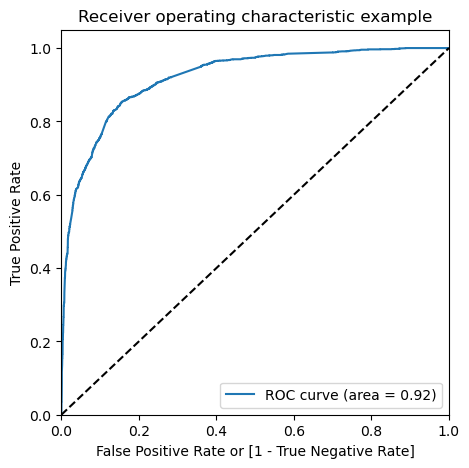

In [121]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

### Finding Optimal Cutoff Point

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.07,2930,0,1,0,0,0,0,0,0,0,0,0
1,0,0.09,378,0,1,0,0,0,0,0,0,0,0,0
2,1,0.99,2655,1,1,1,1,1,1,1,1,1,1,1
3,0,0.30,3752,0,1,1,1,0,0,0,0,0,0,0
4,0,0.17,6388,0,1,1,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.73   0.97   0.58
0.20  0.20      0.81   0.91   0.75
0.30  0.30      0.84   0.86   0.83
0.40  0.40      0.85   0.82   0.87
0.50  0.50      0.85   0.75   0.90
0.60  0.60      0.84   0.69   0.93
0.70  0.70      0.83   0.63   0.95
0.80  0.80      0.82   0.56   0.97
0.90  0.90      0.77   0.42   0.99


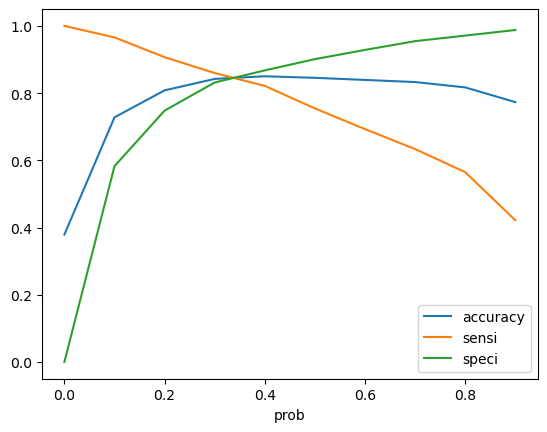

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- As per the above graph 0.3 is the optimum probability that we can take

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.07,2930,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.09,378,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.99,2655,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.30,3752,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.17,6388,0,1,1,0,0,0,0,0,0,0,0,0


In [126]:
y_train_pred_final.head(25)

,Converted,Converted_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.07,2930,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.09,378,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.99,2655,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.30,3752,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.17,6388,0,1,1,0,0,0,0,0,0,0,0,0
5,1,0.73,9197,1,1,1,1,1,1,1,1,1,0,0,1
6,0,0.01,7687,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0.87,5403,1,1,1,1,1,1,1,1,1,1,0,1
8,1,0.94,1721,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0.01,5935,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8423116263211728

In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3029,  613],
       [ 312, 1912]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8597122302158273

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.8316858868753432

In [132]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16831411312465677


In [133]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7572277227722772


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9066147859922179


### Precision and Recall

In [135]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3282,  360],
       [ 546, 1678]], dtype=int64)

#### Using sklearn utilities for Precision & Recall

In [136]:
from sklearn.metrics import precision_score, recall_score

In [137]:
#Checking the Precision (TP / TP + FP)
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8233562315996075

In [138]:
#Checking the Recall (TP / TP + FN)
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7544964028776978

### Precision and recall tradeoff

In [139]:
#Importing Precsion Recall curve
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      1
 14      0
 15      1
 16      0
 17      0
 18      0
 19      1
 20      0
 21      0
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      1
 29      0
 30      1
 31      0
 32      1
 33      1
 34      1
 35      1
 36      1
 37      1
 38      0
 39      0
 40      0
 41      1
 42      0
 43      0
 44      0
 45      1
 46      0
 47      1
 48      1
 49      0
 50      1
 51      0
 52      0
 53      1
 54      1
 55      1
 56      0
 57      0
 58      1
 59      0
 60      1
 61      1
 62      0
 63      1
 64      1
 65      0
 66      0
 67      0
 68      0
 69      1
 70      0
 71      1
 72      1
 73      0
 74      0
 75      0
 76      0
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      1
 90      0

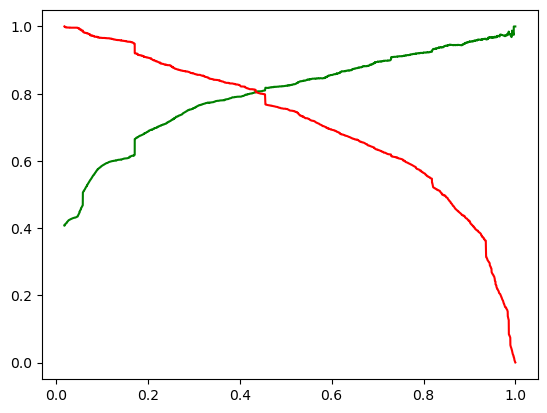

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#PLotting the Precsion Recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 7. Making predictions on the test set

In [141]:
# Transforming the test set
X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

In [142]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Do Not Email_Yes,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst
8158,-0.86,0,1,0,0,0,0,0,0,0,0,0,0,0
1727,-0.86,0,1,0,0,1,0,0,0,0,0,1,0,0
8614,-0.37,0,0,0,0,1,0,0,1,0,0,1,0,0
7713,-0.39,0,0,0,0,0,1,0,0,0,0,1,0,0
8856,-0.86,0,1,0,0,0,0,0,0,0,0,1,0,0


In [143]:
#Adding constant on test data set
X_test_sm = sm.add_constant(X_test)

#### We will make predictions on the test data set:

In [144]:
y_test_pred = logml_3.predict(X_test_sm)

In [145]:
y_test_pred[:10]

8158   0.82
1727   0.06
8614   0.01
7713   0.25
8856   0.17
3694   0.30
7602   0.17
9203   0.94
224    0.17
2174   0.97
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
8158,0.82
1727,0.06
8614,0.01
7713,0.25
8856,0.17


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting Lead ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Converted,Lead_ID,0
0,1,8158,0.82
1,0,1727,0.06
2,0,8614,0.01
3,0,7713,0.25
4,0,8856,0.17


In [152]:
# Renaming the column 0
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [153]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Converted_Prob'], axis=1)

In [154]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob
0,8158,1,0.82
1,1727,0,0.06
2,8614,0,0.01
3,7713,0,0.25
4,8856,0,0.17


In [155]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [156]:
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,8158,1,0.82,1
1,1727,0,0.06,0
2,8614,0,0.01,0
3,7713,0,0.25,0
4,8856,0,0.17,0


In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8417495029821074

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1276,  250],
       [ 148,  841]], dtype=int64)

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8503538928210314

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.836173001310616

#### We will assign lead score from 0 to 100 to each of the leads which can be used by the company to target potential leads.

In [162]:
#Making a copy of y_train_predict data
y_train_pred_Lead_score = y_train_pred_final.copy()

# Removing Threshold values col from y train data set
y_train_pred_Lead_score=y_train_pred_Lead_score[['Lead_ID','Converted','Converted_Prob','final_predicted']]
y_train_pred_Lead_score.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,2930,1,0.07,0
1,378,0,0.09,0
2,2655,1,0.99,1
3,3752,0,0.30,0
4,6388,0,0.17,0


In [163]:
# Doing the same with y_pred_final data i.e making the copy of the same
y_test_pred_Lead_score = y_pred_final.copy()
y_test_pred_Lead_score.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,8158,1,0.82,1
1,1727,0,0.06,0
2,8614,0,0.01,0
3,7713,0,0.25,0
4,8856,0,0.17,0


In [164]:
#Now we will concat the both the data frames

Final_pred_Lead_Score=y_train_pred_Lead_score.append(y_test_pred_Lead_score)

#Checking the head
Final_pred_Lead_Score.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,2930,1,0.07,0
1,378,0,0.09,0
2,2655,1,0.99,1
3,3752,0,0.30,0
4,6388,0,0.17,0


In [165]:
#Checking if the Lead ID are unique
len(Final_pred_Lead_Score['Lead_ID'].unique().tolist())

8381

In [166]:
# Assigning the the Lead Score to Final Data set
Final_pred_Lead_Score['Lead_Score']=Final_pred_Lead_Score['Converted_Prob'].apply(lambda x: round(x*100))

#Checking the head to check if Lead_Score has been assigned
Final_pred_Lead_Score.head()

,Lead_ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,2930,1,0.07,0,7
1,378,0,0.09,0,9
2,2655,1,0.99,1,99
3,3752,0,0.30,0,30
4,6388,0,0.17,0,17


In [167]:
#Sorting the Data set in ascending order based on Lead id
Final_pred_Lead_Score=Final_pred_Lead_Score.sort_values('Lead_ID',ascending = True,ignore_index=True)

In [168]:
#Checking the head
Final_pred_Lead_Score.head()

,Lead_ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,0,0,0.82,1,82
1,1,0,0.15,0,15
2,2,1,0.83,1,83
3,3,0,0.08,0,8
4,4,1,0.62,1,62


### 8. Final conclusion of our analysis:

1. We have observed that the optimal cut off is at 0.3 based on the sensitivity and specificity while calculating the final prediction.

2. The top 3 variables which will help us to convert leads are:
    - Lead Lead Source_Welingak Website
    - Lead Orogin_Lead Add Form
    - What is your current occupation_Working Professional


3. After RFE and VIF checks we concluded that the 3rd model will be a good model for the logistic regression. Here all the variables had low VIF and low p values.

4. Accuracy for test data set is 84%, Sensitivity is 85% and specificity is 84% - all of them are pretty close to the train data set results.

5. Seeing the overall accuracy at 84% it seems to be a pretty good model for our analysis of lead scoring.

----------------------------------------------------------------------------------------------------------